In [1]:
import os
import pandas as pd
import numpy as np

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

LABELS = ['pocket','swing','texting','whatever'] 

### read raw data files and add label colomn by parsing the file name 

In [2]:
def loadFile(root,file):
    print 'loading : ' , file 
    data=pd.read_csv(os.path.join(root,file))
    data['source']=file  
    for label in LABELS:
        if file.lower().startswith(label.lower()):
            # print 'add label : ', label
            data['label']=label
            return data
    data['label']=LABELS[-1]
    return data

In [3]:
def loadFiles(inputDir):
    print 'loading files from : ' , inputDir 
    return pd.concat([loadFile(inputDir,f) for f in os.listdir(inputDir) if f.lower().endswith('.csv')])  

In [4]:
rdf = loadFiles(r'../raw-data/utf8')

loading files from :  ../raw-data/utf8
loading :  SwingRightPhoneDownScBody.csv
loading :  swingLeftHandPhoneDownScBody.csv
loading :  TextingPointingDorwatd.csv
loading :  swing3.csv
loading :  Pocket2.csv
loading :  PocketLeftAidePhoneDownScBodyLoose.csv
loading :  Texting2.csv
loading :  SwingRight2.csv
loading :  swing4.csv
loading :  swing2.csv


In [5]:
rdf.head()

,time,gfx,gFy,gFz,wx,wy,wz,p,Bx,By,Bz,Unnamed: 11,source,label
0,0.006,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.6127,-28.4439,-5.0415,-30.7419,NaN,SwingRightPhoneDownScBody.csv,swing
1,0.011,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,NaN,SwingRightPhoneDownScBody.csv,swing
2,0.021,0.0144,0.4479,0.8753,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,NaN,SwingRightPhoneDownScBody.csv,swing
3,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,NaN,SwingRightPhoneDownScBody.csv,swing
4,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,NaN,SwingRightPhoneDownScBody.csv,swing


In [6]:
rdf.dropna(axis=1,inplace=True)
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78392 entries, 0 to 11818
Data columns (total 13 columns):
time      78392 non-null float64
gfx       78392 non-null float64
gFy       78392 non-null float64
gFz       78392 non-null float64
wx        78392 non-null float64
wy        78392 non-null float64
wz        78392 non-null float64
p         78392 non-null float64
Bx        78392 non-null float64
By        78392 non-null float64
Bz        78392 non-null float64
source    78392 non-null object
label     78392 non-null object
dtypes: float64(11), object(2)
memory usage: 8.4+ MB


In [7]:
rdf.head()

,time,gfx,gFy,gFz,wx,wy,wz,p,Bx,By,Bz,source,label
0,0.006,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.6127,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing
1,0.011,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing
2,0.021,0.0144,0.4479,0.8753,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing
3,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing
4,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing


## preprocessing 
#### todos :lowpass filter , remove dc & normlaize 


## generate features 
#### todos : calculate norm feature for g-force , gyro 
####  avarage norm on sliding window 

In [8]:
rdf['gforce'] = np.sqrt(rdf['gfx']**2 + rdf['gFy']**2 + rdf['gFz']**2) 
rdf['gyro'] = np.sqrt(rdf['wx']**2 + rdf['wy']**2 + rdf['wz']**2) 

In [9]:
rdf.head()

,time,gfx,gFy,gFz,wx,wy,wz,p,Bx,By,Bz,source,label,gforce,gyro
0,0.006,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.6127,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing,0.689125,0.647603
1,0.011,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing,0.689125,0.647603
2,0.021,0.0144,0.4479,0.8753,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing,0.983347,0.647603
3,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing,0.983347,0.464174
4,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,SwingRightPhoneDownScBody.csv,swing,0.983347,0.464174


In [13]:
rdf['mgforce'] = rdf['gforce'].rolling(window=128,center=False).mean()
rdf['mgforce'].fillna(value=rdf['mgforce'].mean(),inplace=True)

rdf['mgyro'] = rdf['gyro'].rolling(window=128,center=False).mean()
rdf['mgyro'].fillna(value=rdf['mgyro'].mean(),inplace=True)


In [14]:
#rdf.dropna(inplace=True)
rdf.drop('source',axis=1).head(10)

,time,gfx,gFy,gFz,wx,wy,wz,p,Bx,By,Bz,label,gforce,gyro,mgforce,mgyro
0,0.006,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.6127,-28.4439,-5.0415,-30.7419,swing,0.689125,0.647603,1.159066,1.832329
1,0.011,0.0143,0.4008,0.5604,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,swing,0.689125,0.647603,1.159066,1.832329
2,0.021,0.0144,0.4479,0.8753,0.2233,-0.4407,-0.4187,978.5864,-28.4439,-5.0415,-30.7419,swing,0.983347,0.647603,1.159066,1.832329
3,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,swing,0.983347,0.464174,1.159066,1.832329
4,0.045,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-28.4439,-5.0415,-30.7419,swing,0.983347,0.464174,1.159066,1.832329
5,0.046,0.0144,0.4479,0.8753,-0.0982,0.4523,-0.0352,978.5864,-27.9343,-4.7241,-34.0576,swing,0.983347,0.464174,1.159066,1.832329
6,0.107,-0.1047,0.4727,1.0072,-0.0982,0.4523,-0.0352,978.5864,-27.9343,-4.7241,-34.0576,swing,1.117524,0.464174,1.159066,1.832329
7,0.108,-0.1047,0.4727,1.0072,-0.0982,0.4523,-0.0352,978.5864,-26.9562,-4.6585,-35.2692,swing,1.117524,0.464174,1.159066,1.832329
8,0.160,-0.1260,0.4406,1.1935,-0.0982,0.4523,-0.0352,978.5864,-26.9562,-4.6585,-35.2692,swing,1.278455,0.464174,1.159066,1.832329
9,0.183,-0.1260,0.4406,1.1935,-0.0982,0.4523,-0.0352,978.5864,-27.8183,6.9717,-29.2908,swing,1.278455,0.464174,1.159066,1.832329


### visualize

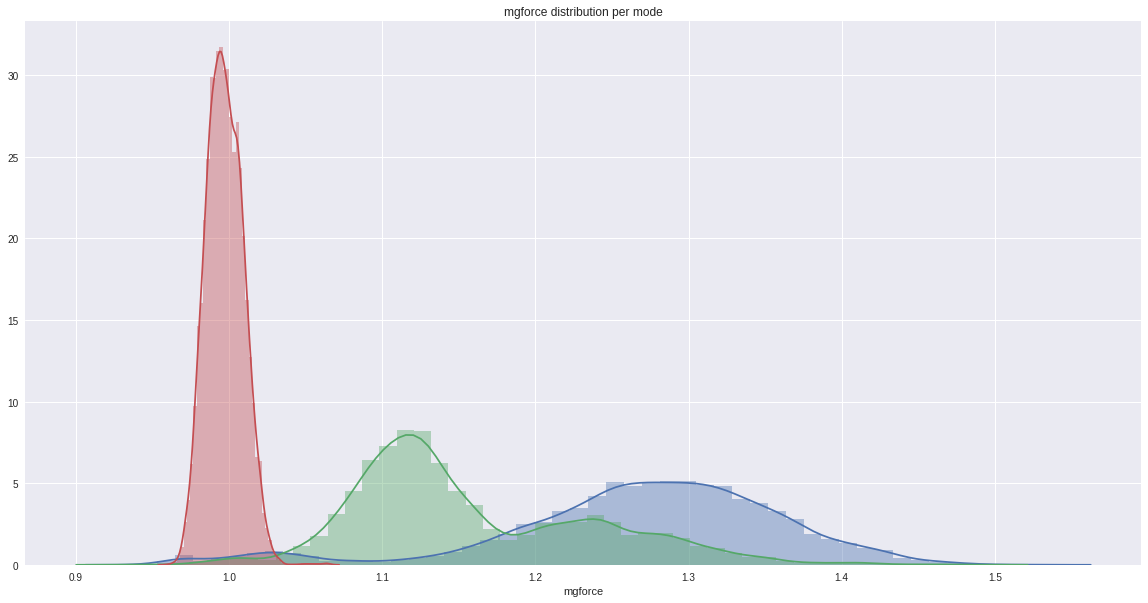

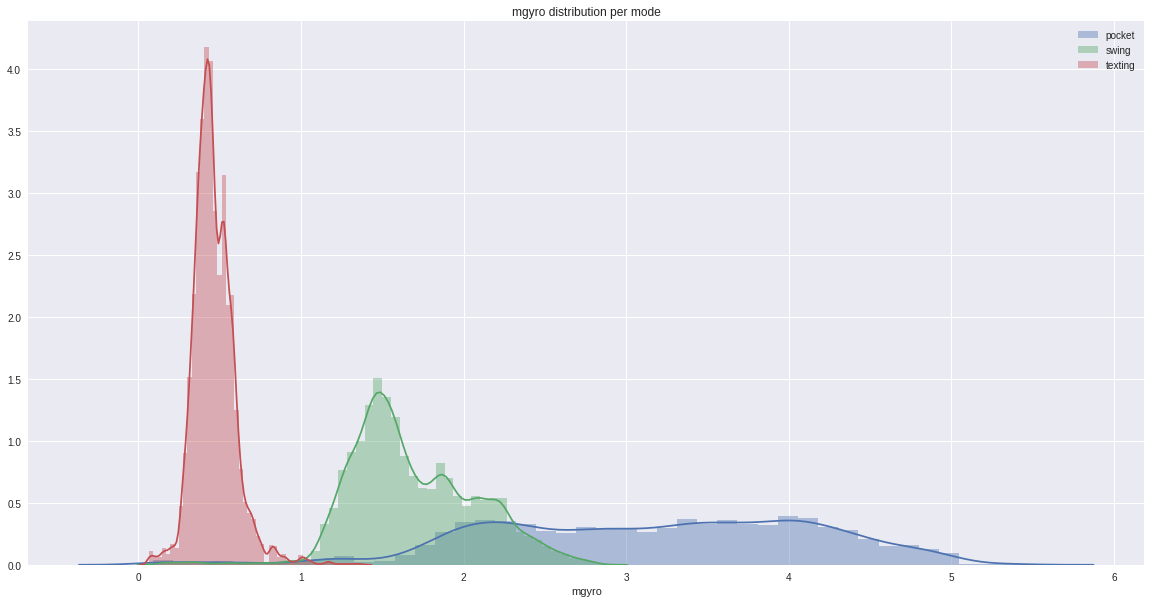

In [15]:
features = ['mgforce','mgyro']
for f in features:
    plt.figure(figsize=(20,10))
    plt.title(f + " distribution per mode")
    for l in LABELS:    
        if l != 'whatever':
            sns.distplot(rdf[rdf.label == l][f], label=l)
plt.legend()
plt.show()

## split train & test data

In [ ]:
from sklearn.model_selection import train_test_split
